## **Building Innovative Systems**
#### **(UCS757)**

**Name: Manik**

**Roll number: 101903077**

Assignment:1

In [23]:
#Assignment-1 (Prediction in time series dataset)
#Name: Manik

#import required librariesimport pandas as pd
import numpy as np
import pandas as pd
import math
import seaborn as sns
import warnings
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')

In [24]:
#reading dataset
dataset = pd.read_excel('DATASET.xlsx')
dataset

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [25]:
j = 0
for i in range(100):
    dataset.iloc[j:j + 10, 0] = dataset.iloc[j, 0]
    j += 10

In [26]:
dataset.columns = dataset.columns.str.replace('Unnamed: 0', 'Group')
dataset.fillna(0, inplace=True)
test_dataset = dataset.loc[dataset['year'] == 10]
test_dataset

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,0,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,0,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,0,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


In [27]:
test_dataset.columns = test_dataset.columns.str.replace('Unnamed: 0', 'Group')
test_dataset

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,0,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,0,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,0,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


In [28]:
dataset.head()

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [7]:
dataset.tail()

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
1004,0,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,0,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,0,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,0,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883
1008,0,10,454.0,986.3,14.3,67.0,24,122,4415,721,293.0,39.8,7.0,18,1.889


In [29]:
etr = ExtraTreesRegressor(n_estimators=200,bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=1000,
                    min_impurity_decrease=0.0, 
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0.1,
                    n_jobs=None, oob_score=False, random_state=123, verbose=0,
                    warm_start=False)
predict_col_names = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']
result = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}

In [30]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [31]:
def selectedModel(val):
    RMSE = []
    N = 0
    index = 0
    #For Applying ExtraTreesRegressor
    if(val==0):
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                #Extracting Train and Test Data
                xtrain = dataset.iloc[i:i+9, 1:10]
                ytrain = dataset.iloc[i:i+9, j]
                xtest = dataset.iloc[i+9, 1:10].to_numpy()
                ytest = dataset.iloc[i+9, j]

                #Applying Random Forest 
                etr.fit(xtrain, ytrain)

                #Predicting Values
                ypred = etr.predict(xtest.reshape(1,-1))[0]

                #Appending Results
                result[predict_col_names[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
            
    #For Applying Random Forest    
    else:
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                #Extracting Train and Test Data
                xtrain = dataset.iloc[i:i+9, 1:10]
                ytrain = dataset.iloc[i:i+9, j]
                xtest = dataset.iloc[i+9, 1:10].to_numpy()
                ytest = dataset.iloc[i+9, j]

                #Applying Random Forest 
                rf.fit(xtrain, ytrain)

                #Predicting Values
                ypred = rf.predict(xtest.reshape(1,-1))[0]

                #Appending Results
                result[predict_col_names[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
    return (RMSE, count)

In [32]:
result_RMSE, result_count = selectedModel(0)

In [33]:
dataset_predicted = pd.DataFrame.from_dict(result)
dataset_predicted

,Para-9,Para-10,Para-11,Para-12,Para-13
0,3.1625,57.4390,49.305,7.970,1.910250
1,58.9195,28.6880,0.910,7.915,0.792135
2,70.3385,0.0000,0.000,13.340,1.372835
3,20.4650,55.0285,57.850,7.445,1.861645
4,0.0000,258.6755,34.000,5.990,1.759120
...,...,...,...,...,...
95,0.0000,93.4970,14.025,3.995,1.341360
96,75.5525,155.4340,3.980,5.695,1.337525
97,0.0740,27.7380,14.015,10.130,1.032960
98,39.1120,30.6325,7.280,9.515,0.775955


In [34]:
for i in result_RMSE:
    print((i/result_count)**0.5)

61.08945576811477
65.20447252133093
25.94427205116767
14.551270958235909
0.31062429473975883


In [35]:
result_RMSE

[373192.1606044451,
 425162.3236785001,
 67310.52522649999,
 21173.94864999998,
 9.648745248257258]

In [36]:
print("Total RMSE:")
print((sum(result_RMSE)/500)**0.5)   # we got 46. with second model

Total RMSE:
42.11528480028821


In [45]:
import random
ind = []
for i in range(40):
    ind.append(random.randint(0,100))

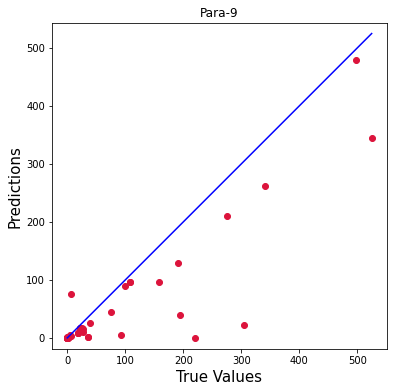

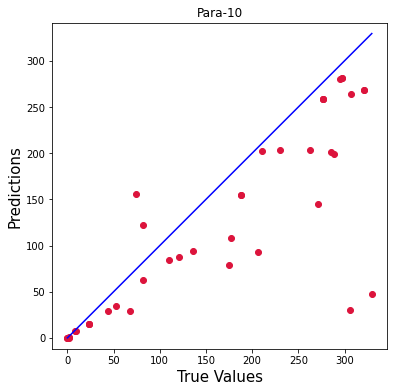

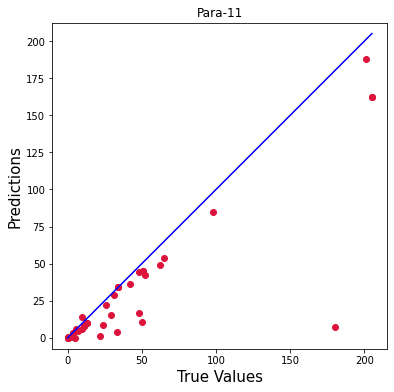

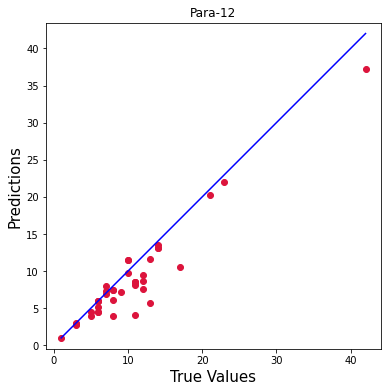

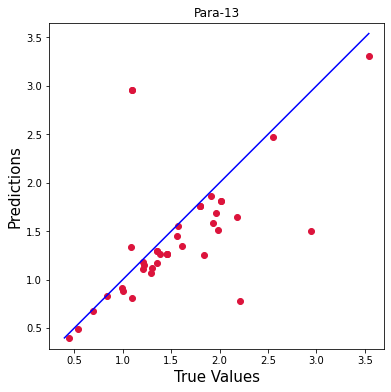

In [49]:
for i in range(5):
    plt.figure(figsize=(6,6))
    true_value = test_dataset.iloc[ind, i+10]
    predicted_value = dataset_predicted.iloc[ind, i]
    plt.scatter(true_value, predicted_value, c='crimson')

    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.title(predict_col_names[i])
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

# **End of Assignment!!**